**Decision Tree Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Generating a synthetic dataset
np.random.seed(42) # for reproducibility

n_samples = 200

# Generate Age: skewed slightly towards older people who might have more purchasing power
age = np.random.normal(loc=45, scale=15, size=n_samples).astype(int)
age = np.clip(age, 20, 70) # Clip ages to a reasonable range

# Generate EstimatedSalary: related to age, with some noise
estimated_salary = (age * 500 + np.random.normal(loc=50000, scale=30000, size=n_samples)).astype(int)
estimated_salary = np.clip(estimated_salary, 20000, 150000) # Clip salaries to a reasonable range

# Generate Purchased: make it dependent on both age and estimated salary
# Higher age and higher salary increase the probability of purchase
purchase_probability = 1 / (1 + np.exp(-(0.05 * age + 0.00005 * estimated_salary - 10))) # Sigmoid function
purchased = (np.random.rand(n_samples) < purchase_probability).astype(int)

# Create the DataFrame
data = {'Age': age, 'EstimatedSalary': estimated_salary, 'Purchased': purchased}
df = pd.DataFrame(data)
df

,Age,EstimatedSalary,Purchased
0,52,86733,0
1,42,87823,0
2,54,109491,1
3,67,115114,0
4,41,29169,0
...,...,...,...
195,50,60924,0
196,31,20000,0
197,47,114116,0
198,45,69063,0


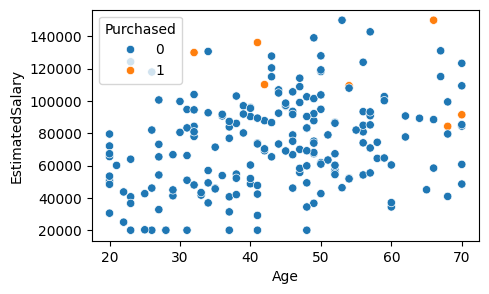

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

In [ ]:
x = df.iloc[:, :-1]
y = df['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =pd.DataFrame(sc.fit_transform(x))


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape

(150, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
classifier.score(x_test, y_test), classifier.score(x_train, y_train)

(0.98, 0.98)

In [ ]:
classifier.predict([[50,60924]])

array([0])

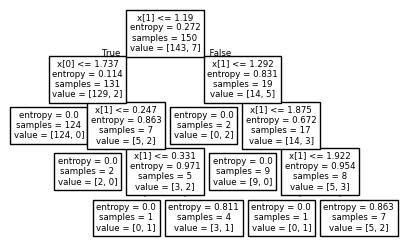

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 3))
plot_tree(classifier)
plt.show()

In [ ]:
for i in range(1, 20):
  classifier2 = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  classifier2.fit(x_train, y_train)
  print(f"Depth: {i}, Accuracy: {classifier2.score(x_test, y_test), classifier2.score(x_train,y_train)}")

Depth: 1, Accuracy: (1.0, 0.9533333333333334)
Depth: 2, Accuracy: (0.98, 0.9666666666666667)
Depth: 3, Accuracy: (0.98, 0.9666666666666667)
Depth: 4, Accuracy: (0.98, 0.98)
Depth: 5, Accuracy: (0.98, 0.98)
Depth: 6, Accuracy: (0.98, 0.9933333333333333)
Depth: 7, Accuracy: (0.98, 1.0)
Depth: 8, Accuracy: (0.98, 1.0)
Depth: 9, Accuracy: (0.98, 1.0)
Depth: 10, Accuracy: (0.98, 1.0)
Depth: 11, Accuracy: (0.98, 1.0)
Depth: 12, Accuracy: (0.98, 1.0)
Depth: 13, Accuracy: (0.98, 1.0)
Depth: 14, Accuracy: (0.98, 1.0)
Depth: 15, Accuracy: (0.98, 1.0)
Depth: 16, Accuracy: (0.98, 1.0)
Depth: 17, Accuracy: (0.98, 1.0)
Depth: 18, Accuracy: (0.98, 1.0)
Depth: 19, Accuracy: (0.98, 1.0)


**Decision Tree Regression**

In [ ]:
np.random.seed(42) # for reproducibility

n_samples = 500

# Generate Age: skewed slightly towards middle age
age = np.random.normal(loc=40, scale=10, size=n_samples).astype(int)
age = np.clip(age, 22, 65) # Clip ages to a reasonable range

# Generate Experience (in years): strongly related to age
experience = (age - 22) * 0.8 + np.random.normal(loc=0, scale=3, size=n_samples)
experience = np.clip(experience, 0, age - 22) # Experience cannot exceed age - 22

# Generate Salary: related to experience and age, with significant noise
salary = 30000 + (experience * 2500) + (age * 500) + np.random.normal(loc=0, scale=15000, size=n_samples)
salary = np.clip(salary, 35000, 250000).astype(int) # Clip salaries to a reasonable range

# Create the DataFrame
data = {'Age': age, 'Salary': salary, 'Experience': experience,}
df_reg = pd.DataFrame(data)


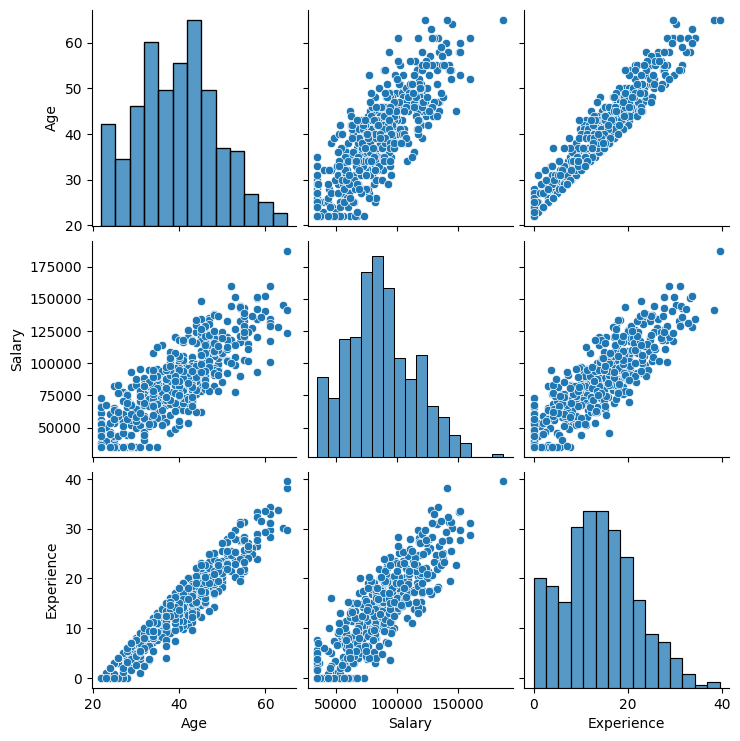

In [ ]:
sns.pairplot(df_reg)
plt.show()

In [ ]:
x = df_reg.iloc[:, :-1]
y = df_reg['Experience']

In [ ]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
regressor = DecisionTreeRegressor(max_depth=6)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [ ]:
regressor.score(x_test, y_test)*100, regressor.score(x_train, y_train)*100

(83.88125982676122, 96.17266868853332)

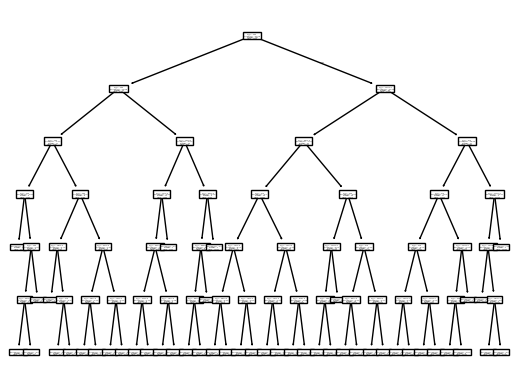

In [ ]:
plot_tree(regressor)
plt.show()

In [ ]:
for i in range(1, 20):
  classifier2 = DecisionTreeRegressor(max_depth=i)
  classifier2.fit(x_train, y_train)
  print(f"Depth: {i}, Accuracy: {classifier2.score(x_test, y_test), classifier2.score(x_train,y_train)}")

Depth: 1, Accuracy: (0.5550084855556373, 0.5243668792543457)
Depth: 2, Accuracy: (0.7342687336995768, 0.7840341670632085)
Depth: 3, Accuracy: (0.8098714440793813, 0.8880774414410345)
Depth: 4, Accuracy: (0.8495153991750612, 0.9227565933443649)
Depth: 5, Accuracy: (0.8446830313240015, 0.9454380655351571)
Depth: 6, Accuracy: (0.8299916786578849, 0.9617266868853332)
Depth: 7, Accuracy: (0.8191997695919657, 0.9789660551290505)
Depth: 8, Accuracy: (0.8087651290525418, 0.9899985430083713)
Depth: 9, Accuracy: (0.7949478532765707, 0.9959382686215981)
Depth: 10, Accuracy: (0.8044861150127789, 0.9982848613851371)
Depth: 11, Accuracy: (0.8035697825265334, 0.9994780672693679)
Depth: 12, Accuracy: (0.8085079318080588, 0.999989451245298)
Depth: 13, Accuracy: (0.8070609492074562, 1.0)
Depth: 14, Accuracy: (0.8052633008318837, 1.0)
Depth: 15, Accuracy: (0.8102041096788616, 1.0)
Depth: 16, Accuracy: (0.8065597548047685, 1.0)
Depth: 17, Accuracy: (0.8040668966243617, 1.0)
Depth: 18, Accuracy: (0.7975180